# Convergence tutorial
This tutorial shows you how to process the calcualtions performed after using the `surfaxe.generation` module.
In general, it should help you make decisions about further calculations you may wish to beform on your slabs. 
It includes:

- Parsing raw calculation files to get summary data. 
- Plotting surface energy as a function of slab and vacuum thickness.
- Plotting calcualtion time as a function of slab and vacuum thickness.

This example is based on calculations run using VASP. 

Assuming the convergence testing folders were made with `surfaxe` they can easily be parsed to extract:

- DFT total energy
- DFT total energy per atom
- surface energy
- calculation time elapsed 

for each slab/vacuum thickness/index combination.

In [1]:
# Import relevant surfaxe modules 
from surfaxe.convergence import parse_fols 
from surfaxe.io import plot_enatom, plot_surfen

# Import pandas and matplotlib, set figure size 
import pandas as pd
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8.0,7.0)
mpl.rcParams.update({'font.size': 10})

# Import path to example data 
from pathlib import Path 
path_to_conv_data = Path.cwd().parents[1].joinpath('example_data/convergence/Y2Ti2S2O5')

By default, `parse_fols` looks in the current working directory, but the relative path to the folders can also be specified. It searches through root for folders named `slab_vac_index`, following the name convention from the `generation` module. Miller index and bulk energy per atom must be supplied to the function. The parsed data is automatically written to a `hkl_data.csv` file and the plots of surface energy and energy per atom are also plotted. 

In [3]:
parse_fols(hkl=(0,0,1), 
           bulk_per_atom=-8.83099767,
           path_to_fols=str(path_to_conv_data),
           plt_enatom=False, 
           plt_surfen=False, verbose=True, save_csv=True, csv_name='testio')

/Users/dan/src/surfaxe/example_data/convergence/Y2Ti2S2O5/001 20_30_15
/Users/dan/src/surfaxe/example_data/convergence/Y2Ti2S2O5/001 20_20_15
/Users/dan/src/surfaxe/example_data/convergence/Y2Ti2S2O5/001 20_50_15
/Users/dan/src/surfaxe/example_data/convergence/Y2Ti2S2O5/001 30_20_15
/Users/dan/src/surfaxe/example_data/convergence/Y2Ti2S2O5/001 30_30_15
/Users/dan/src/surfaxe/example_data/convergence/Y2Ti2S2O5/001 30_50_15


/Users/dan/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:281: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/dan/opt/anaconda3/lib/python3.7/site-packages/pymatgen/io/vasp/outputs.py:145: UserWarning: Float overflow (*******) encountered in vasprun
  warnings.warn("Float overflow (*******) encountered in vasprun")
/Users/dan/opt/anaconda3/lib/python3.7/site-packages/pymatgen/io/vasp/outputs.py:145: UserWarning: Float overflow (*******) encountered in vasprun
  warnings.warn("Float overflow (*******) encountered in vasprun")


The UserWarning about POTCARs can be ignored as the POTCARs are not included in the example data set.  

Based on the data obtained with `parse_fols`, plotting functions from `surfaxe.io` can make the surface energy and energy per atom heatmaps or line plots. Both `plot_surfen` and `plot_enatom` can account for different terminations (different slab indices) and plot them on the same figure. These convergence plots are useful as they allow for quick visual comparison to note at what slab and vacuum thickness the energies converge. Both plots also show time taken for calculations to complete by default. 

The surface energies are plotted using `plot_surfen` as shown here: 

In [4]:
df_surfen = pd.read_csv(str(path_to_conv_data.joinpath('001_data.csv')))

plot_surfen(df_surfen, plt_fname='202_surface_energy.png')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/dan/src/surfaxe/example_data/convergence/Y2Ti2S2O5/001_data.csv'

The energies per atom are plotted using `plot_enatom`: 

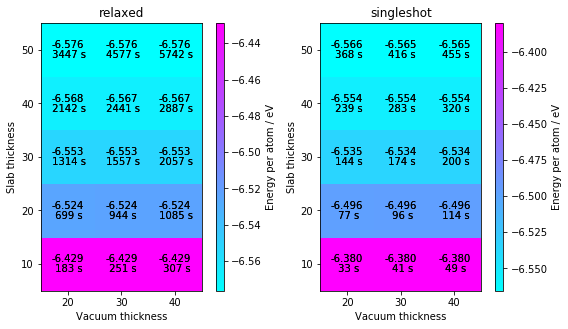

In [27]:
df_enatom = pd.read_csv(str(path_to_conv_data.joinpath('110_data.csv')))
plot_enatom(df_enatom, cmap='cool', heatmap=True, plt_fname='110_energy_per_atom.png')

If the energies are plotted as heatmaps, the default colourmap can be changed to any other Matplotlib colourmap but note that some of the colourmaps will likely be too dark to display the numbers. 

For plotting directly from `parse_fols`, the same keyword arguments are passed to both plots (i.e. both are either heatmaps or line plots) but filenames of the plots can be changed.  